In [28]:
# creating a class for regression
class LinearRegression:

    def __init__(self, alpha, iterations):
        self.alpha = alpha
        self.iterations = iterations

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.m, self.n = self.x.shape
        self.b = 0
        self.w = np.zeros(self.n)
        for i in range(self.iterations):
            self.updates()

    def updates(self):
        y_pred = 1.0 / (1 + np.exp(-(np.dot(self.x, self.w) + self.b)))
        d_w = (1 / (2 * self.m)) * np.dot(self.x.T, (y_pred - self.y))
        d_b = (1 / (2 * self.m)) * np.sum(y_pred - self.y)
        self.w -= self.alpha * d_w
        self.b -= self.alpha * d_b

    def predict(self, x):
        y_pred = (1.0 / (1 + np.exp(-(np.dot(self.x, self.w) + self.b))))
        y_pred = np.where( y_pred > 0.5, 1, 0)
        return y_pred
    

In [29]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
# reading the csv files and dropping any NaN values
df = pd.read_csv("WineQuality.csv")
df.dropna()
df.isnull
df


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine
32481,6414,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5,White Wine
32482,1126,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,White Wine
32483,2924,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,White Wine


In [31]:
# assigning features to numpy arrays and applying logistic regression
df['Type'].replace(['White Wine', 'Red Wine'], [0, 1], inplace=True)
y = np.array(df['Type'])
gn = df.drop(columns = 'Unnamed: 0', axis = 1)
ng = gn.drop(columns = 'density', axis = 1)
x = ng.drop(columns = 'Type', axis =1)
from sklearn.preprocessing import StandardScaler
gf = StandardScaler()
gf.fit(x)
standardized_data = gf.transform(x)
x = standardized_data

In [32]:
# calculating the estimated predicted values
gn = LinearRegression(0.01, 10000)
gn.fit(x, y)
y_calc = gn.predict(x)

<function matplotlib.pyplot.show(close=None, block=None)>

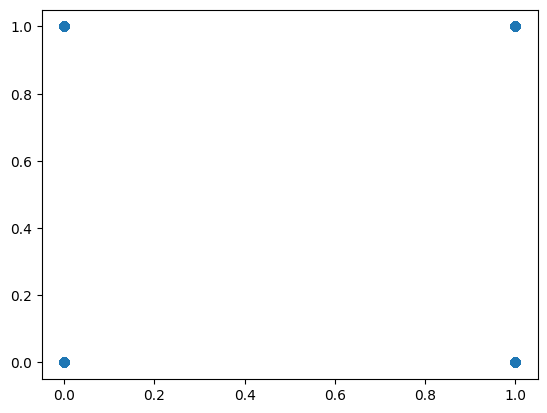

In [33]:
# plotting the graph
plt.scatter(y, y_calc)
plt.show

In [34]:
# finding the accuracy from scikit learn accuracy score library
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_calc))

0.9898722487301832
